# Match comparision
* TF2Ecck Vs TF2Ecch Vs TF2Ecc Vs TF2

<table ><tr><th > waveform <th><th> PN <th><th> spin <th><th> eccentricity<th><th> periastron adv<th><th> harmonics <tr><tr>
<tr><td> TF2Ecck  <td><td> 3PN  <td><td> No <td><td> Yes <td><td> Yes<td><td> Yes <td><tr>
<tr><td> TF2Ecch  <td><td> 3PN  <td><td> No <td><td> Yes <td><td> No<td><td> Yes <td><tr>
<tr><td> TF2Ecc  <td><td> 3PN  <td><td> No <td><td> Yes <td><td> No<td><td> No <td><tr>
<tr><td> TF2  <td><td> 3PN  <td><td> No <td><td> No <td><td> No<td><td> No <td><tr><table> 

In [1]:
import numpy as np
import bilby
import matplotlib.pyplot as plt
from pycbc.filter.matchedfilter import match
from pycbc.types.frequencyseries import FrequencySeries
%matplotlib inline

C = 299792458.
G = 6.67408*1e-11
Mo = 1.989*1e30
Mpc = 3.086*1e22

In [2]:
time_of_event = 1246527184.169434
post_trigger_duration = 1.
duration = 4.0
analysis_start = time_of_event + post_trigger_duration - duration
sampling_frequency = 128.

In [3]:
# mass to chirp_mass and mass_ratio conversion 
mass_1 = 36.
mass_2 = 29.

chirp_mass = ( (mass_1*mass_2)**(3/5) )/( (mass_1+mass_2)**(1/5) )
mass_ratio = mass_2/mass_1
print("chirp_mass = {}, mass_ratio = {}".format(chirp_mass, mass_ratio))

ff = (C**3)/( G*(mass_1+mass_2)*Mo*np.pi*6**(3/2) )
print("flso = {}".format(ff))

chirp_mass = 28.09555579546043, mass_ratio = 0.8055555555555556
flso = 67.6310005682923


In [4]:
minimum_frequency = 10.0
maximum_frequency = 64.

ifos = bilby.gw.detector.InterferometerList(['H1', 'L1'])
for ifo in ifos:
    ifo.minimum_frequency = minimum_frequency
    ifo.maximum_frequency = maximum_frequency
ifos.set_strain_data_from_zero_noise(
    sampling_frequency=sampling_frequency, duration=duration,
    start_time=analysis_start)

# For a single set of parameters 

In [5]:
# with e=0.1
injection_parameters = {'mass_1':36., 'mass_2':29., 'eccentricity':0.1, 'a_1':0., 'a_2':0., 'tilt_1':0.,
                         'tilt_2':0., 'phi_12':0., 'phi_jl':0., 'luminosity_distance':600., 'theta_jn':0.4, 'psi':2.659, 
                         'phase':1.3, 'geocent_time':1246527184.169434, 'ra':1.375, 'dec':-1.2108,}
# with e=0.0
injection_parameters2 = {'mass_1':36., 'mass_2':29., 'eccentricity':0.001, 'a_1':0., 'a_2':0., 'tilt_1':0.,
                         'tilt_2':0., 'phi_12':0., 'phi_jl':0., 'luminosity_distance':600., 'theta_jn':0.4, 'psi':2.659, 
                         'phase':1.3, 'geocent_time':1246527184.169434, 'ra':1.375, 'dec':-1.2108,}

In [6]:
############# TF2Ecck waveform model ################
waveform_arguments0 = dict(waveform_approximant='TaylorF2Ecck',
                          reference_frequency=20., minimum_frequency=20., pn_phase_order=6, pn_tidal_order=0)

waveform_generator0 = bilby.gw.WaveformGenerator(
    duration=duration, sampling_frequency=sampling_frequency,
    frequency_domain_source_model=bilby.gw.source.lal_eccentric_binary_black_hole_no_spins,
    parameters=injection_parameters, waveform_arguments=waveform_arguments0)

############# TF2Ecch waveform model ################
waveform_arguments1 = dict(waveform_approximant='TaylorF2Ecch',
                          reference_frequency=20., minimum_frequency=20.)

waveform_generator1 = bilby.gw.WaveformGenerator(
    duration=duration, sampling_frequency=sampling_frequency,
    frequency_domain_source_model=bilby.gw.source.lal_eccentric_binary_black_hole_no_spins,
    parameters=injection_parameters, waveform_arguments=waveform_arguments1)

############# TF2Ecc waveform model ################
waveform_arguments3 = dict(waveform_approximant='TaylorF2Ecc',
                          reference_frequency=20., minimum_frequency=20., pn_phase_order=6, pn_tidal_order=0)

waveform_generator3 = bilby.gw.WaveformGenerator(
    duration=duration, sampling_frequency=sampling_frequency,
    frequency_domain_source_model=bilby.gw.source.lal_eccentric_binary_black_hole_no_spins,
    parameters=injection_parameters, waveform_arguments=waveform_arguments3)

############# TF2 waveform model ################
waveform_arguments4 = dict(waveform_approximant='TaylorF2',
                          reference_frequency=20., minimum_frequency=20., pn_phase_order=6, pn_amplitude_order=0.)

waveform_generator4 = bilby.gw.WaveformGenerator(
    duration=duration, sampling_frequency=sampling_frequency,
    frequency_domain_source_model=bilby.gw.source.lal_eccentric_binary_black_hole_no_spins,
    parameters=injection_parameters, waveform_arguments=waveform_arguments4)

16:23 bilby INFO    : Waveform generator initiated with
  frequency_domain_source_model: bilby.gw.source.lal_eccentric_binary_black_hole_no_spins
  time_domain_source_model: None
  parameter_conversion: bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters
16:23 bilby INFO    : Waveform generator initiated with
  frequency_domain_source_model: bilby.gw.source.lal_eccentric_binary_black_hole_no_spins
  time_domain_source_model: None
  parameter_conversion: bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters
16:23 bilby INFO    : Waveform generator initiated with
  frequency_domain_source_model: bilby.gw.source.lal_eccentric_binary_black_hole_no_spins
  time_domain_source_model: None
  parameter_conversion: bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters
16:23 bilby INFO    : Waveform generator initiated with
  frequency_domain_source_model: bilby.gw.source.lal_eccentric_binary_black_hole_no_spins
  time_domain_source_model: None
  parameter_conversi

In [7]:
# checks
# injection_parameters2: e0=0.0001
# TF2Ecck vs TF2
# not exactly same
polas1 = waveform_generator0.frequency_domain_strain(parameters = injection_parameters2)
polas2 = waveform_generator4.frequency_domain_strain(parameters = injection_parameters2)
arr1 = FrequencySeries(polas1['plus'], delta_f=1/duration)
arr2 = FrequencySeries(polas2['plus'], delta_f=1/duration)
psd_ = FrequencySeries(ifos[0].power_spectral_density_array, delta_f=1/duration)
print('match=',match(arr1, arr2, psd=psd_, \
      low_frequency_cutoff=20, high_frequency_cutoff=124))

match= (0.9999985903712314, 0)


In [8]:
# checks
# injection_parameters2: e0=0.0001
# TF2Ecck vs TF2
# not exactly same
polas1 = waveform_generator1.frequency_domain_strain(parameters = injection_parameters2)
polas2 = waveform_generator4.frequency_domain_strain(parameters = injection_parameters2)
arr1 = FrequencySeries(polas1['plus'], delta_f=1/duration)
arr2 = FrequencySeries(polas2['plus'], delta_f=1/duration)
psd_ = FrequencySeries(ifos[0].power_spectral_density_array, delta_f=1/duration)
print('match=',match(arr1, arr2, psd=psd_, \
      low_frequency_cutoff=20, high_frequency_cutoff=124))

match= (0.9999986582492684, 0)


In [9]:
# checks
# injection_parameters2: e0=0.0001
# TF2Ecc vs TF2
# same
polas1 = waveform_generator3.frequency_domain_strain(parameters = injection_parameters2)
polas2 = waveform_generator4.frequency_domain_strain(parameters = injection_parameters2)
arr1 = FrequencySeries(polas1['plus'], delta_f=1/duration)
arr2 = FrequencySeries(polas2['plus'], delta_f=1/duration)
psd_ = FrequencySeries(ifos[0].power_spectral_density_array, delta_f=1/duration)
print('match=',match(arr1, arr2, psd=psd_, \
      low_frequency_cutoff=20, high_frequency_cutoff=124))

match= (0.9999999998495522, 0)


* TF2Ecck and TF2Ecch doesn't go exactly to TF2 at negligible eccentricity

# change in eccentricity

### TF2Ecck vs TF2Ecch and TF2Ecc

In [16]:
# TF2Ecck vs TF2Ecch
match_array1 = []
eccn_array = np.linspace(0.01,0.20,20)
for eccn in eccn_array:
    injection_parameters = {'mass_1':36., 'mass_2':29., 'eccentricity':eccn, 'a_1':0., 'a_2':0., 'tilt_1':0.,
                         'tilt_2':0., 'phi_12':0., 'phi_jl':0., 'luminosity_distance':600., 'theta_jn':0.4, 'psi':2.659, 
                         'phase':1.3, 'geocent_time':1246527184.169434, 'ra':1.375, 'dec':-1.2108,}
    
    polas1 = waveform_generator0.frequency_domain_strain(parameters = injection_parameters) # TF2Ecck
    polas2 = waveform_generator3.frequency_domain_strain(parameters = injection_parameters) # TF2Ecch
    arr1 = FrequencySeries(polas1['plus'], delta_f=1/duration)
    arr2 = FrequencySeries(polas2['plus'], delta_f=1/duration)
    psd_ = FrequencySeries(ifos[0].power_spectral_density_array, delta_f=1/duration)
    match_array1.append(match(arr1, arr2, psd=psd_, low_frequency_cutoff=20, high_frequency_cutoff=64))
match_array1_0 = np.array(match_array1)[:,0]

In [18]:
# TF2Ecck vs TF2Ecc
match_array3 = []
eccn_array = np.linspace(0.01,0.20,20)
for eccn in eccn_array:
    injection_parameters = {'mass_1':36., 'mass_2':29., 'eccentricity':eccn, 'a_1':0., 'a_2':0., 'tilt_1':0.,
                         'tilt_2':0., 'phi_12':0., 'phi_jl':0., 'luminosity_distance':600., 'theta_jn':0.4, 'psi':2.659, 
                         'phase':1.3, 'geocent_time':1246527184.169434, 'ra':1.375, 'dec':-1.2108,}
    
    polas1 = waveform_generator1.frequency_domain_strain(parameters = injection_parameters) # TF2Ecck
    polas2 = waveform_generator3.frequency_domain_strain(parameters = injection_parameters) # TF2Ecc
    arr1 = FrequencySeries(polas1['plus'], delta_f=1/duration)
    arr2 = FrequencySeries(polas2['plus'], delta_f=1/duration)
    psd_ = FrequencySeries(ifos[0].power_spectral_density_array, delta_f=1/duration)
    match_array3.append(match(arr1, arr2, psd=psd_, low_frequency_cutoff=20, high_frequency_cutoff=64))
match_array3_0 = np.array(match_array3)[:,0]

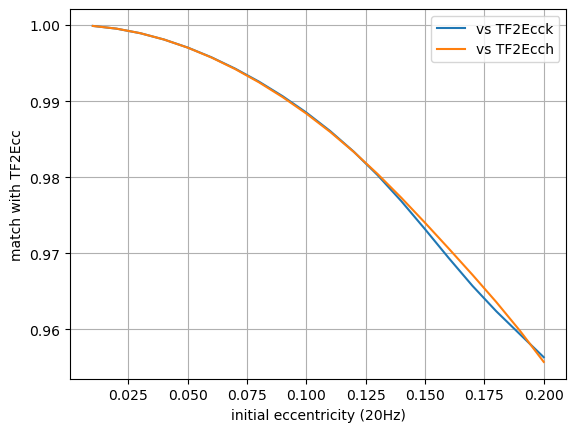

In [19]:
# plus
plt.plot(eccn_array,match_array1_0) #TF2Ecck vs TF2Ecch
plt.plot(eccn_array,match_array3_0) #TF2Ecck vs TF2Ecc
#plt.plot(eccn_array,match_array2_0) #TF2Ecck vs TF2

plt.grid()
plt.gca().legend(('vs TF2Ecck','vs TF2Ecch'))
plt.xlabel(r"initial eccentricity (20Hz)")
plt.ylabel(r"match with TF2Ecc")
plt.savefig("match1.png")
plt.show()

In [13]:
# TF2Ecck vs TF2Ecch
match_array1 = []
eccn_array = np.linspace(0.01,0.20,20)
for eccn in eccn_array:
    injection_parameters = {'mass_1':13.46, 'mass_2':9.87, 'eccentricity':eccn, 'a_1':0., \
                        'a_2':0., 'tilt_1':0., 'tilt_2':0., 'phi_12':0., 'phi_jl':0., \
                        'luminosity_distance':500., 'theta_jn':2.6, 'psi':1.54, 'phase':3.32, \
                        'geocent_time':1246527184.169434, 'ra':3.32, 'dec':-1.0,}
    
    polas1 = waveform_generator1.frequency_domain_strain(parameters = injection_parameters) # TF2Ecck
    polas2 = waveform_generator0.frequency_domain_strain(parameters = injection_parameters) # TF2Ecch
    arr1 = FrequencySeries(polas1['plus'], delta_f=1/duration)
    arr2 = FrequencySeries(polas2['plus'], delta_f=1/duration)
    psd_ = FrequencySeries(ifos[0].power_spectral_density_array, delta_f=1/duration)
    match_array1.append(match(arr1, arr2, psd=psd_, low_frequency_cutoff=20, high_frequency_cutoff=128))
match_array1_0 = np.array(match_array1)[:,0]

In [14]:
# TF2Ecck vs TF2Ecc
match_array3 = []
eccn_array = np.linspace(0.01,0.20,20)
for eccn in eccn_array:
    injection_parameters = {'mass_1':13.46, 'mass_2':9.87, 'eccentricity':eccn, 'a_1':0., \
                        'a_2':0., 'tilt_1':0., 'tilt_2':0., 'phi_12':0., 'phi_jl':0., \
                        'luminosity_distance':500., 'theta_jn':2.6, 'psi':1.54, 'phase':3.32, \
                        'geocent_time':1246527184.169434, 'ra':3.32, 'dec':-1.0,}
    
    polas1 = waveform_generator3.frequency_domain_strain(parameters = injection_parameters) # TF2Ecck
    polas2 = waveform_generator0.frequency_domain_strain(parameters = injection_parameters) # TF2Ecc
    arr1 = FrequencySeries(polas1['plus'], delta_f=1/duration)
    arr2 = FrequencySeries(polas2['plus'], delta_f=1/duration)
    psd_ = FrequencySeries(ifos[0].power_spectral_density_array, delta_f=1/duration)
    match_array3.append(match(arr1, arr2, psd=psd_, low_frequency_cutoff=20, high_frequency_cutoff=128))
match_array3_0 = np.array(match_array3)[:,0]

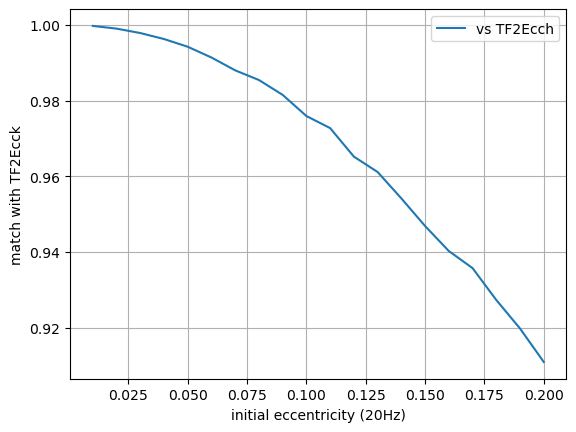

In [15]:
# plus
plt.plot(eccn_array,match_array1_0) #TF2Ecck vs TF2Ecch
#plt.plot(eccn_array,match_array3_0) #TF2Ecck vs TF2Ecc
#plt.plot(eccn_array,match_array2_0) #TF2Ecck vs TF2

plt.grid()
plt.gca().legend(('vs TF2Ecch','vs TF2Ecc'))
plt.xlabel(r"initial eccentricity (20Hz)")
plt.ylabel(r"match with TF2Ecck")
plt.savefig("match1.png")
plt.show()